In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

出行频率

In [9]:
file_path = "D:/Data/Sample/trip_freq.csv"
freq=pd.read_csv(file_path,header=None)
freq.columns=['card_id','stage_freq','trip_freq']
freq=freq[freq.trip_freq<10]

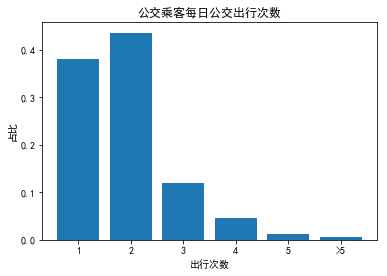

In [33]:
#%% trip_freq
trip_count=freq.trip_freq.value_counts()
y=np.array([trip_count[1],trip_count[2],trip_count[3],trip_count[4],trip_count[5],sum(trip_count[trip_count.index>5])])/trip_count.sum()
x_label=['1','2','3','4','5','>5']
fig,ax=plt.subplots()
ax.bar(np.arange(6),y)
ax.set_xticks(np.arange(6))
ax.set_xticklabels(x_label)
ax.set_xlabel(u'出行次数')
ax.set_ylabel(u'占比')
plt.title(u'公交乘客每日公交出行次数')
plt.savefig('D:/Data/Sample/figure_statistics/trip_freq.png',dpi=300)
plt.show()

前后出行时间间隔

In [40]:
file_path = "D:/Data/Sample/interval_between_trip.csv"
interval=pd.read_csv(file_path,header=None)
interval=interval[0]

In [60]:
counts=[]
for i in range(24):
    counts.append(interval[(interval>i)&(interval<=i+1)].size)
counts=np.array(counts)/interval.shape[0]

counts_1h=[]
for i in range(0,60,5):
    counts_1h.append(interval[(interval>i/60)&(interval<=(i+5)/60)].size)
counts_1h=np.array(counts_1h)/interval.shape[0]

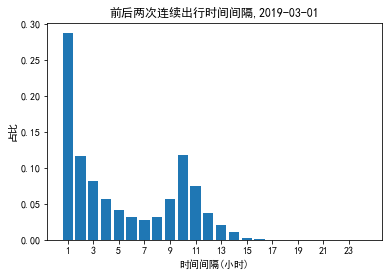

In [97]:
fig,ax=plt.subplots()
ax.bar(np.arange(1,25),counts)
ax.set_xticks(np.arange(1,25,2))
ax.set_xticklabels([str(i) for i in np.arange(1,25,2)])
ax.set_xlabel(u'时间间隔(小时)')
ax.set_ylabel(u'占比')
ax.set_title(u'前后两次连续出行时间间隔,2019-03-01')
plt.savefig('D:/Data/Sample/figure_statistics/interval_between_trip_24h.png',dpi=300)
plt.show()

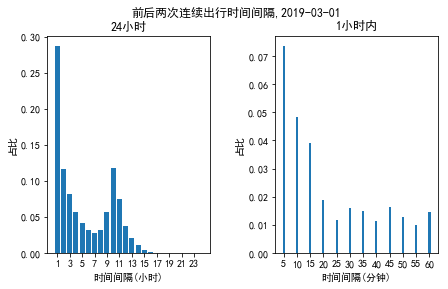

In [62]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,4))
ax[0].bar(np.arange(1,25),counts)
ax[0].set_xticks(np.arange(1,25,2))
ax[0].set_xticklabels([str(i) for i in np.arange(1,25,2)])
ax[0].set_xlabel(u'时间间隔(小时)')
ax[0].set_ylabel(u'占比')
ax[0].set_title(u'24小时')

ax[1].bar(np.arange(5,65,5),counts_1h)
ax[1].set_xticks(np.arange(5,65,5))
ax[1].set_xticklabels([str(i) for i in np.arange(5,65,5)])
ax[1].set_xlabel(u'时间间隔(分钟)')
ax[1].set_ylabel(u'占比')
ax[1].set_title(u'1小时内')

fig.suptitle(u'前后两次连续出行时间间隔,2019-03-01')
fig.subplots_adjust(wspace=0.4)

plt.savefig('D:/Data/Sample/figure_statistics/interval_between_trip.png',dpi=300)
plt.show()

In [63]:
file_path = "D:/Data/Sample/trip_dura_dist.csv"
trip_dura_dist=pd.read_csv(file_path,header=None)
trip_dura_dist.columns=['card_id','dist','dura']

In [81]:
trip_dura_dist=trip_dura_dist[trip_dura_dist.dura>0]
trip_dura_dist=trip_dura_dist[trip_dura_dist.dura<5]
trip_dura_dist=trip_dura_dist[trip_dura_dist.dist<80000]

In [84]:

# trip_dura_dist.dura.describe()
trip_dura_dist.dist.describe()
# trip_dura_dist[trip_dura_dist.dura>3].shape

count    9.112487e+06
mean     9.243607e+03
std      9.209419e+03
min      0.000000e+00
25%      2.719222e+03
50%      6.297892e+03
75%      1.283468e+04
max      7.999408e+04
Name: dist, dtype: float64

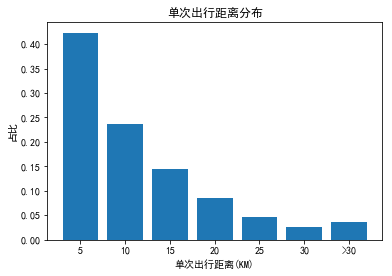

In [90]:
dist_inter=np.array([5,10,15,20,25,30])*1000
count_dist=[]
for i in dist_inter:
    count_dist.append(trip_dura_dist[(trip_dura_dist.dist>i-5000)&(trip_dura_dist.dist<=i)].shape[0])
count_dist.append(trip_dura_dist.shape[0]-sum(count_dist))
count_dist=np.array(count_dist)/trip_dura_dist.shape[0]
fig,ax=plt.subplots()
ax.bar(np.arange(len(count_dist)),count_dist)
ax.set_xticks(np.arange(len(count_dist)))
ax.set_xticklabels([str(i) for i in [5,10,15,20,25,30]] +['>30'])
ax.set_xlabel(u'单次出行距离(KM)')
ax.set_ylabel(u'占比')
plt.title(u'单次出行距离分布')
plt.savefig('D:/Data/Sample/figure_statistics/trip_dist.png',dpi=300)
plt.show()

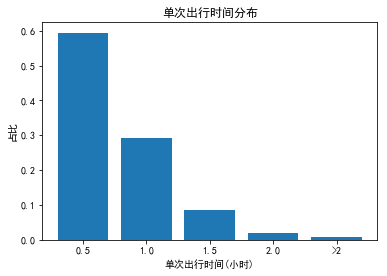

In [102]:
dura_inter=np.array([0.5,1,1.5,2])
count_dura=[]
for i in dura_inter:
    count_dura.append(trip_dura_dist[(trip_dura_dist.dura>i-0.5)&(trip_dura_dist.dura<=i)].shape[0])
count_dura.append(trip_dura_dist.shape[0]-sum(count_dura))
count_dura=np.array(count_dura)/trip_dura_dist.shape[0]
fig,ax=plt.subplots()
ax.bar(np.arange(len(count_dura)),count_dura)
ax.set_xticks(np.arange(len(count_dura)))
ax.set_xticklabels([str(i) for i in dura_inter] +['>2'])
ax.set_xlabel(u'单次出行时间(小时)')
ax.set_ylabel(u'占比')
plt.title(u'单次出行时间分布')
plt.savefig('D:/Data/Sample/figure_statistics/trip_dura.png',dpi=300)
plt.show()

In [96]:
count_dura

array([0.59416743, 0.29337611, 0.08528012, 0.02019087, 0.00698547])

In [101]:
sum(counts[11:])

0.07353138093087724